# COGS 108 - Final Project 

# Overview

This project analyzes San Diego Park Yelp reviews data by text analysis. First, I found the most common words in those reviews; then, I used improved technique TF-IDF to find the most unique and important words; finally, I used Support Vector Machine to classify and predict the five-rate parks from reviews. 

# Name & GitHub ID

- Name: Xinkai Wang
- GitHub Username: x5wang

# Research Question

How do most people evaluate San Diego Parks? Could we infer a person's rating of a park from his/her review?

## Background and Prior Work

Parks are important components of people's lives in a city, particularly in San Diego where parks offer people a place to chill out and enjoy their free time. Hence, it is important to hear from people: if people talk about something a lot, then it is prabably a distinguishing feature of San Diego Parks to be preserved; otherwise, if the parks have some features intended to be compelling but not in reality, then those are the places where San Diego Parks could be improved. 

Currently, articles and journals focus on the access and facilities San Diego Parks could improve on. By looking at the most popular words from reviews, we could gain some insights in what the popular facilities are and how people think of them, like dog area, parking lots, walk roads, etc. Specifically, San Diego Parks manage to provide sports facilities, so we can see what sports facilities people mention often to determine what kinds of spaces should be incorporated. 

For this project, we are not focusing on sports facilities, but how people evaluate San Diego Parks in general and how positive their evaluations are. Then, further analyses could be done to select the words related to facilities to accomplish the tasks many articles and journals are considering. If people want to learn more about San Diego Parks, please take a look at the resources below:

First, it is helpful to have access to all the locations of parks and recreation centers in San Diego. We can take a look at the official website of San Diego government that provided the authentative data, including the basic information of each location of parks and recreation centers. They are referenced in links 1 and 2. 

Second, there is a website that provides the "concept design" for many San Diego parks, and each design contains the map of the park as well as the park facilities inside the park. This is the background information to consider the inclusion of specific park elements such as trees, dog zones, benches as possibly the major factors that make the park more popular than others. It is referenced in link 3. 

Third, there is a relevant research that concerns about what groups of youths are involved in parks and recreation centers. Indeed, park and recreation facilities play a large role for youths, and by understanding how the specific factors like age, gender make some places more popular, we could know more about what facilities to be incorporated to better suit for the needs of the majority group of youths who are more likely to spend time in parks and recreation centers in San Diego. It is referenced in link 4. 

References:
- 1) Park Locations: https://data.sandiego.gov/datasets/park-locations/
- 2) Recreation Center Locations: https://data.sandiego.gov/datasets/recreation-center-locations/
- 3) Parks Development Plans: https://www.sdparks.org/content/sdparks/en/AboutUs/Plans/ParksImprovementPlan.html
- 4) Parks and Recreation Centers for promoting youth physical activities: https://journals.sagepub.com/doi/abs/10.1177/1524839903258222?casa_token=zY4_gBWhS8IAAAAA%3Ap_asa_O6u4EuifWqB_G7J8XRx7DGqibROZNJpKHZ6lea2Gvr958MVPN_L5QGsdx_yW2ZR0UGvITd&

# Hypothesis


Many people tend to use general words like "great", "nice", possibly features like "dog area", "bench", since we are considering the most common words; also, we might be able to construct a model to predict 5-rate parks pretty accurately from reviews, since typically 5.0 ratings are with lots of positive words to be identified. 

# Dataset(s)

- Dataset Name: San Diego Park Information
- Link to the dataset: https://www.yelp.com/
- Number of observations: 833

This dataset contains basic information about each of the 833 San Diego Parks, as well as the rating and review counts of each park. 

- Dataset Name: San Diego Park Reviews
- Link to the dataset: https://www.yelp.com/
- Number of observations: 2333

This dataset contains 2333 ratings of various San Diego Parks along with the text of the associated reviews from the ratings. 

# Setup

Let's first import the relevant packages. 

In [1]:
# numpy, pandas, matplotlib, seaborn setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 7)
plt.rcParams.update({'font.size': 14})
import seaborn as sns

# import natural language toolkit
import nltk

Below is the head data to take a look. 

In [2]:
df_parks = pd.read_csv('yelp_SD_parks.csv')
df_parks.head()

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",NaN,3AEHjqNrTmggA6G9VdhQfg,https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",1.619233e+10,3unbJeYrn1RmInZGmjp80g,https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",NaN,PvHxIYrmaiFKdWUDTMDzcg,https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",NaN,6IF4VB9-fkv_F-LBvG8ppQ,https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False


In [3]:
df_reviews = pd.read_csv('yelp_SD_reviews.csv')
df_reviews.head()

,id,rating,text
0,Balboa Park,5,Balboa Park is a must see when coming to San D...
1,Balboa Park,5,Beautiful grounds even to take a stroll during...
2,Balboa Park,5,Beautiful sightseeing in San Diego. Lots of wa...
3,Civita Park,5,Was invited to child's B-Day party pre Covid-1...
4,Civita Park,5,"Pretty nice park, beautiful design. Anyone is..."


In [4]:
# information about rows and columns
print(df_parks.shape, df_reviews.shape)

(833, 10) (2333, 3)


# Data Cleaning

We need to check how may nonresponses there are from each variable. 

In [5]:
df_parks.isnull().sum()

name              0
address           0
phone           254
id                0
url               0
rating            0
review_count      0
longitude         1
latitude          1
is_closed         0
dtype: int64

Since we do not need the specific park details for our analysis, we can just drop those columns. 

In [6]:
df_parks = df_parks[['name', 'rating', 'review_count']]
df_parks.head()

,name,rating,review_count
0,Balboa Park,5.0,2105
1,Civita Park,4.5,46
2,Waterfront Park,4.5,242
3,Trolley Barn Park,4.5,102
4,Bay View Park,5.0,42


Then, we check the other dataset, and there are no null values, so we do not need to worry about cleaning the data. 

In [7]:
# how many nonresponses
df_reviews.isnull().sum()

id        0
rating    0
text      0
dtype: int64

# Data Analysis & Results

We can first visualize the distributions of ratings to get a sense of how well people evaluate those parks. 

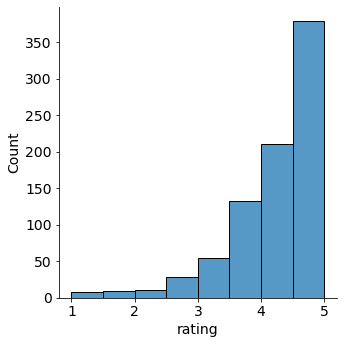

In [8]:
sns.displot(df_parks['rating'], bins=8)

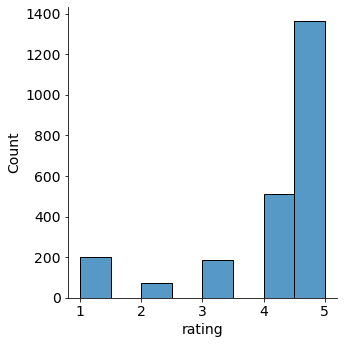

In [9]:
sns.displot(df_reviews['rating'], bins=8)

Both graphs are strongly skewed to the left, so people's reviews of the parks are fairly good. 

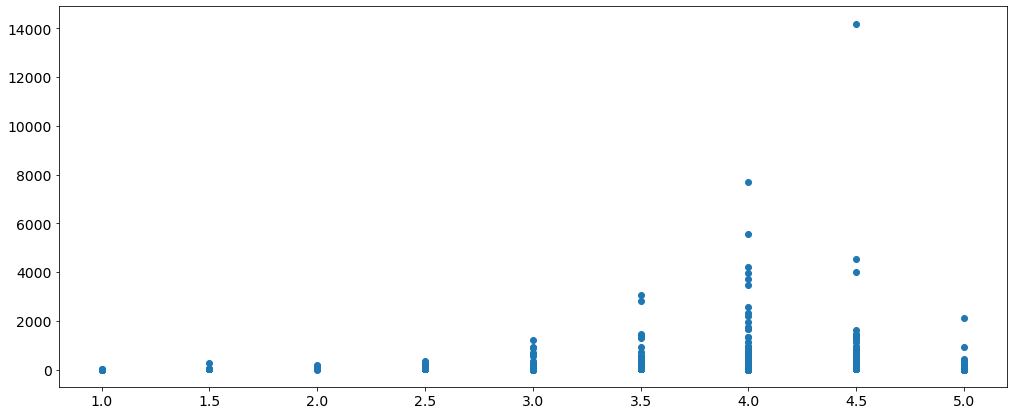

In [47]:
plt.scatter(df_parks['rating'], df_parks['review_count'])

As we can see, there are more variations of review counts and higher review counts for 4.0 rating, and there are less variations and lower review counts for ratings both higher and lower from 4.0. 

Then, we are going to preprocess those reviews to trim the data. First, we will tokenize the words to separate them out from a sentence. 

In [10]:
## import word tokenizer
from nltk.tokenize import word_tokenize

In [11]:
tokenized_word = word_tokenize(df_reviews.loc[100,'text'])
print(tokenized_word)

['SOOO', 'beautiful', '.', 'My', 'best', 'friend', 'and', 'I', 'discovered', 'this', 'park', 'today', 'and', 'it', 'is', 'so', 'peaceful', 'and', 'has', 'tons', 'of', 'shade', '.', 'Such', 'a', 'friendly', 'environment', '..']


Here, we have added a new column with tokenized words. 

In [12]:
df_reviews['token'] = df_reviews['text'].apply(word_tokenize)
df_reviews.head()

,id,rating,text,token
0,Balboa Park,5,Balboa Park is a must see when coming to San D...,"[Balboa, Park, is, a, must, see, when, coming,..."
1,Balboa Park,5,Beautiful grounds even to take a stroll during...,"[Beautiful, grounds, even, to, take, a, stroll..."
2,Balboa Park,5,Beautiful sightseeing in San Diego. Lots of wa...,"[Beautiful, sightseeing, in, San, Diego, ., Lo..."
3,Civita Park,5,Was invited to child's B-Day party pre Covid-1...,"[Was, invited, to, child, 's, B-Day, party, pr..."
4,Civita Park,5,"Pretty nice park, beautiful design. Anyone is...","[Pretty, nice, park, ,, beautiful, design, ., ..."


There are lots of words called stop words that are not meaningful, so we can just eliminate those words to filter the sentences. 

In [13]:
# import stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# look at stop words
print(stop_words)

{'your', 'nor', 'whom', 'during', 'd', 'was', 'ain', 'hadn', 'ma', 'isn', 'in', 'yourself', 'below', 'own', "wasn't", 'only', 'weren', "mightn't", 'by', 'wasn', 'll', 'herself', 'now', 'while', "haven't", 'and', 'have', 'once', 'a', 'himself', 'off', 'other', 'through', 'm', 'is', 'hers', 'to', 'won', 'theirs', 'or', 'their', 'ours', "wouldn't", 'she', 'those', 'yourselves', 'same', 'should', 'as', "didn't", 'them', 'too', 'what', "mustn't", 'has', 'further', 'all', "should've", 'from', 'who', 'will', 'did', 'how', 'just', 'into', "hadn't", "hasn't", 'until', 'her', "she's", 'this', 'before', 'then', 'can', 'because', 'you', 'our', 'with', 'both', 'needn', 'hasn', 'but', "shouldn't", "shan't", 'of', 'his', 'the', 'over', 'don', 'here', 'couldn', 'out', 'down', 'at', "aren't", 'these', 'were', 'mightn', 'be', 'than', 'no', "you're", 'do', 'there', 'haven', 't', "you'll", 'him', 'mustn', 'wouldn', "you've", 'any', 'few', 'its', 'i', 'doesn', 'myself', 'where', 'some', 'such', 'that', 'no

In [14]:
# example of removing stop words
filtered_sent = []
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:", tokenized_word)
print("Filtered Sentence:", filtered_sent)

Tokenized Sentence: ['SOOO', 'beautiful', '.', 'My', 'best', 'friend', 'and', 'I', 'discovered', 'this', 'park', 'today', 'and', 'it', 'is', 'so', 'peaceful', 'and', 'has', 'tons', 'of', 'shade', '.', 'Such', 'a', 'friendly', 'environment', '..']
Filtered Sentence: ['SOOO', 'beautiful', '.', 'My', 'best', 'friend', 'I', 'discovered', 'park', 'today', 'peaceful', 'tons', 'shade', '.', 'Such', 'friendly', 'environment', '..']


In [15]:
df_reviews['stop'] = df_reviews['token'].apply(lambda x: [item for item in x if item not in stop_words])
df_reviews.head()

,id,rating,text,token,stop
0,Balboa Park,5,Balboa Park is a must see when coming to San D...,"[Balboa, Park, is, a, must, see, when, coming,...","[Balboa, Park, must, see, coming, San, Diego, ..."
1,Balboa Park,5,Beautiful grounds even to take a stroll during...,"[Beautiful, grounds, even, to, take, a, stroll...","[Beautiful, grounds, even, take, stroll, Covid..."
2,Balboa Park,5,Beautiful sightseeing in San Diego. Lots of wa...,"[Beautiful, sightseeing, in, San, Diego, ., Lo...","[Beautiful, sightseeing, San, Diego, ., Lots, ..."
3,Civita Park,5,Was invited to child's B-Day party pre Covid-1...,"[Was, invited, to, child, 's, B-Day, party, pr...","[Was, invited, child, 's, B-Day, party, pre, C..."
4,Civita Park,5,"Pretty nice park, beautiful design. Anyone is...","[Pretty, nice, park, ,, beautiful, design, ., ...","[Pretty, nice, park, ,, beautiful, design, ., ..."


Next, the words have different forms, so we need to standardize those words by stemming. 

In [16]:
# stemming
from nltk.stem import PorterStemmer

ps = PorterStemmer()

stemmed_words = []
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:", filtered_sent)
print("Stemmed Sentence:", stemmed_words)

Filtered Sentence: ['SOOO', 'beautiful', '.', 'My', 'best', 'friend', 'I', 'discovered', 'park', 'today', 'peaceful', 'tons', 'shade', '.', 'Such', 'friendly', 'environment', '..']
Stemmed Sentence: ['sooo', 'beauti', '.', 'My', 'best', 'friend', 'I', 'discov', 'park', 'today', 'peac', 'ton', 'shade', '.', 'such', 'friendli', 'environ', '..']


In [17]:
df_reviews['stem'] = df_reviews['stop'].apply(lambda x: [ps.stem(y) for y in x])
df_reviews.head()

,id,rating,text,token,stop,stem
0,Balboa Park,5,Balboa Park is a must see when coming to San D...,"[Balboa, Park, is, a, must, see, when, coming,...","[Balboa, Park, must, see, coming, San, Diego, ...","[balboa, park, must, see, come, san, diego, .,..."
1,Balboa Park,5,Beautiful grounds even to take a stroll during...,"[Beautiful, grounds, even, to, take, a, stroll...","[Beautiful, grounds, even, take, stroll, Covid...","[beauti, ground, even, take, stroll, covid, 's..."
2,Balboa Park,5,Beautiful sightseeing in San Diego. Lots of wa...,"[Beautiful, sightseeing, in, San, Diego, ., Lo...","[Beautiful, sightseeing, San, Diego, ., Lots, ...","[beauti, sightse, san, diego, ., lot, walkway,..."
3,Civita Park,5,Was invited to child's B-Day party pre Covid-1...,"[Was, invited, to, child, 's, B-Day, party, pr...","[Was, invited, child, 's, B-Day, party, pre, C...","[wa, invit, child, 's, b-day, parti, pre, covi..."
4,Civita Park,5,"Pretty nice park, beautiful design. Anyone is...","[Pretty, nice, park, ,, beautiful, design, ., ...","[Pretty, nice, park, ,, beautiful, design, ., ...","[pretti, nice, park, ,, beauti, design, ., any..."


In [18]:
# get series of all words after stemming
words = df_reviews['stem'].apply(pd.Series).stack()
print(words)

0     0        balboa
      1          park
      2          must
      3           see
      4          come
              ...    
2332  14       highli
      15    recommend
      16    fairbrook
      17         farm
      18            !
Length: 49068, dtype: object


Until this point we have preprocessed the words and we can visualize the most frequent words in reviews. 

In [19]:
from nltk.probability import FreqDist
import string

# calculation word frequency
fdist_words = FreqDist(words)

# remove punctuation counts
for punc in string.punctuation:
    del fdist_words[punc]

In [20]:
fdist_words

FreqDist({'...': 2187, 'I': 1737, 'park': 964, "'s": 510, 'the': 496, 'place': 404, 'thi': 364, 'great': 361, 'time': 302, 'It': 301, ...})

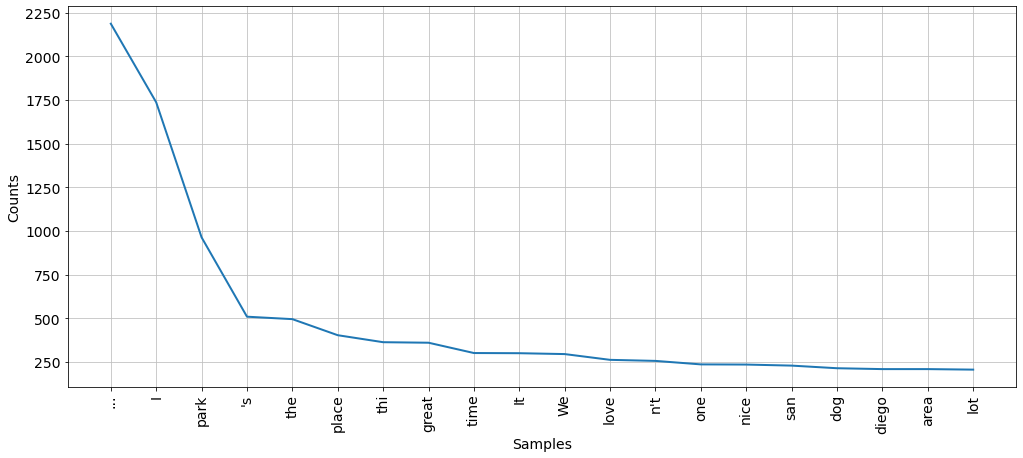

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [21]:
# Frequency Distribution Plot - top 20 words used most frequently in reviews
fdist_words.plot(20, cumulative=False)

From this plot, "great", "love", "nice" are the distinguishing positive words, which are consistent with the high ratings of San Diego Parks; besides, those words are pretty general, which is consistent with our expectation. 

Next, we are doing a sentiment analysis. 

In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
analyser = SentimentIntensityAnalyzer()

In [23]:
# get list of the 'sentences' (responses) from each individual
words_list = list(df_reviews['text'].values)

In [24]:
# create function that will output dataframe 
# that stores sentiment information
def get_sentiments(input_list):
    
    output = pd.DataFrame()

    for sentence in input_list:
        ss = analyser.polarity_scores(sentence)
        ss['sentence'] = sentence
        output = output.append(ss, ignore_index=True)

    return output

In [25]:
# get sentiment measures
sentiments = get_sentiments(words_list)
sentiments.head()

,compound,neg,neu,pos,sentence
0,0.4215,0.0,0.909,0.091,Balboa Park is a must see when coming to San D...
1,0.9001,0.0,0.621,0.379,Beautiful grounds even to take a stroll during...
2,0.9360,0.0,0.557,0.443,Beautiful sightseeing in San Diego. Lots of wa...
3,0.8916,0.0,0.674,0.326,Was invited to child's B-Day party pre Covid-1...
4,0.9610,0.0,0.507,0.493,"Pretty nice park, beautiful design. Anyone is..."


In [26]:
sentiments.describe()

,compound,neg,neu,pos
count,2333.000000,2333.000000,2333.000000,2333.000000
mean,0.450423,0.030794,0.797502,0.171698
std,0.451691,0.059343,0.126518,0.128245
min,-0.918400,0.000000,0.343000,0.000000
25%,0.077200,0.000000,0.714000,0.082000
50%,0.611400,0.000000,0.804000,0.158000
75%,0.815800,0.054000,0.891000,0.256000
max,0.976300,0.506000,1.000000,0.622000


We can see that most words are neutral, which might be fact-based (people could just say we went to the park on Sunday and did some exercise) or due to the commonality of neutral words in sentences. Except those neutral words, 85% of the words are positive, and the rest 15% are negative, which indicates that people have good reviews for San Diego Parks in general. In the most extreme case, if we take a look at the maximum value in neg column, only 50% words are negative, so there are no mostly negative reviews. 

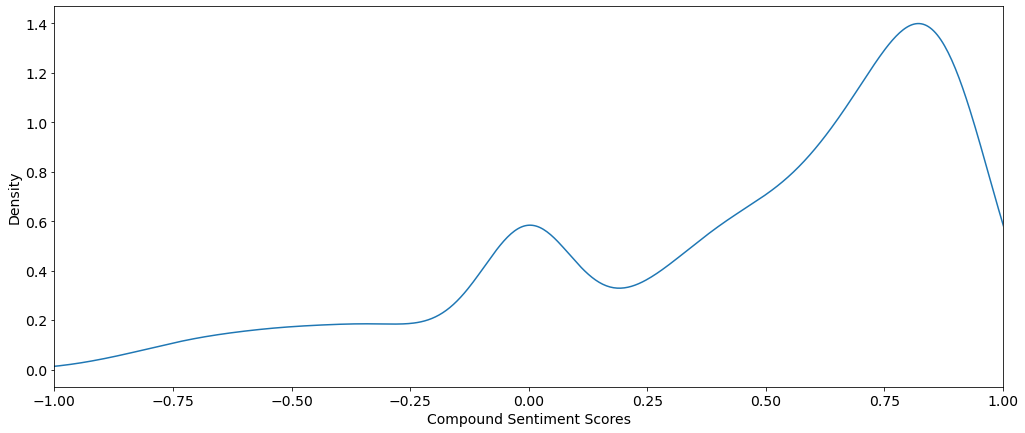

In [27]:
sentiments['compound'].plot.density()
plt.xlabel('Compound Sentiment Scores')
plt.xlim(-1,1);

There is a local maximum at 0, which represents some commonality of neutral words, but the global maximum is around 0.8 and much higher than the rest densities, which also proves that San Diego Parks review are pretty good. 

# TF-IDF

Then, we will calculate TF-IDF to decrease the weights of commonly used words while increase the weights of words typically not widespread in documents. This can help us find the most unique and important words and exclude some neutral words. 

In [28]:
import string 

# lowercase text
words = list(map(str.lower, words_list))

# remove punctuation
for c in string.punctuation:
    words = str(words).replace(c, "")

words = [words]

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
# create vectorizer
tfidf = TfidfVectorizer(sublinear_tf=True,
                        analyzer='word',
                        max_features=200,
                        tokenizer=word_tokenize,
                        stop_words=stop_words)

In [31]:
# calculate TF-IDF
reviews_tfidf = pd.DataFrame(tfidf.fit_transform(words).toarray())
reviews_tfidf.columns = tfidf.get_feature_names()

/Users/x5wang/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [56]:
reviews_tfidf.sort_values(by=0, axis=1, ascending=False).iloc[:,:20]

,park,place,great,time,san,nice,one,diego,love,little,area,get,good,dog,parking,like,years,well,really,beach
0,0.105185,0.095137,0.094943,0.089067,0.088947,0.088582,0.088207,0.087085,0.085637,0.084852,0.084105,0.083759,0.083672,0.083133,0.082856,0.081789,0.081586,0.081275,0.081275,0.081064


We can see that many features like "dog areas", "parking", "beach" increase their representation, and those features could be helpful to know to design parks in ways that people like more. Also, there are more generally positive words like "good", "like", and "well". 

# Support Vector Machine and Cross-Validation

Now, we answering the second research question: could we infer a person's rating of a park from his/her review? First, we select the columns we need. 

In [33]:
df_reviews = df_reviews[['rating', 'text']]
df_reviews.head()

,rating,text
0,5,Balboa Park is a must see when coming to San D...
1,5,Beautiful grounds even to take a stroll during...
2,5,Beautiful sightseeing in San Diego. Lots of wa...
3,5,Was invited to child's B-Day party pre Covid-1...
4,5,"Pretty nice park, beautiful design. Anyone is..."


We randomly sort the data frame to make sure training and testing data are randomly selected and can be representative of all parks within the dataset. 

In [34]:
# randomly sort data frame
df_reviews = df_reviews.sample(frac=1, random_state=200).reset_index(drop=True)
df_reviews.head()

,rating,text
0,5,Southwest middle school is a great school that...
1,5,"Love these apartment homes, but nothing comes ..."
2,4,I have 2 daughters enrolled at CDC. The time t...
3,5,Enjoyable Bridge there are many different Brid...
4,5,I never expected to give a review to an apartm...


Since we are interested in predicting 5-rate parks, we need to label rating of 5 as 1.0 and other ratings as 0.0. 

In [35]:
def convert_label(label):
    if(label == 5):
        return 1.0
    else:
        return 0.0
    return label

In [36]:
df_reviews['y'] = df_reviews['rating'].apply(convert_label)
df_reviews.head()

,rating,text,y
0,5,Southwest middle school is a great school that...,1.0
1,5,"Love these apartment homes, but nothing comes ...",1.0
2,4,I have 2 daughters enrolled at CDC. The time t...,0.0
3,5,Enjoyable Bridge there are many different Brid...,1.0
4,5,I never expected to give a review to an apartm...,1.0


In [37]:
# scikit-learn imports
#   SVM (Support Vector Machine) classifer 
#   Vectorizer, which transforms text data into bag-of-words feature
#   TF-IDF Vectorizer that first removes widely used words in the dataset and then transforms test data
#   Metrics functions to evaluate performance
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, precision_recall_fscore_support

In [38]:
vectorizer = CountVectorizer(analyzer='word', max_features=2000, 
                             tokenizer=word_tokenize, stop_words=stopwords.words('english'))

In [39]:
df_X = vectorizer.fit_transform(df_reviews['text']).toarray()
df_y = np.array(df_reviews['y'])

/Users/x5wang/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Now, we use 80% as training data and 20% as testing data. Then, we train the SVM model using the training data. 

In [40]:
num_training = int(0.8*len(df_reviews))

df_train_X = df_X[:num_training]
df_train_y = df_y[:num_training]
df_test_X = df_X[num_training:]
df_test_y = df_y[num_training:]

In [41]:
def train_SVM(X, y, kernel='linear'):
    clf = SVC(kernel=kernel)
    return clf.fit(X, y)

In [42]:
df_clf = train_SVM(df_train_X, df_train_y)

First, we test our model on our existing training data. The accuracy is 98% percent, which is high enough as expected. 

In [43]:
df_predicted_train_y = df_clf.predict(df_train_X)
df_predicted_test_y = df_clf.predict(df_test_X)

In [44]:
print(classification_report(df_train_y, df_predicted_train_y))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       774
         1.0       0.98      0.99      0.99      1092

    accuracy                           0.98      1866
   macro avg       0.98      0.98      0.98      1866
weighted avg       0.98      0.98      0.98      1866



In [45]:
print(classification_report(df_test_y, df_predicted_test_y))

              precision    recall  f1-score   support

         0.0       0.55      0.53      0.54       195
         1.0       0.67      0.69      0.68       272

    accuracy                           0.63       467
   macro avg       0.61      0.61      0.61       467
weighted avg       0.62      0.63      0.62       467



Here we uses cross-validation, and the accuracy is 63%, which is not really good, but it does have a higher chance to identify 5.0 rating parks than random. 

# Ethics & Privacy

1. Yelp Reviews are open to the public, so it should be permitted to use the data; however, if I need to analyze a specific review, I should cite the source link where the review comes from to prevent any privacy concerns. Also, I did not use any specific park information for analysis, so this avoids chances to expose any identifiable information from the parks data. 
2. One potential bias might be that I did not visualize where the parks are located. Many parks in the dataset might be those in special areas or neighborhoods in San Diego due to population size, transportation, and other shopping malls nearby, etc. Hence, the parks in the dataset might not be representative of all parks distributed in San Diego. If this happens, I may reconsider the dataset and use the strategy of stratified random samples, so that I would select a number of parks in each neighborhood in San Diego. 
3. There might be specific low rating reviews that might not be appropriate to analyze due to their negativities, so I only discussed the general outcomes from those reviews. 

# Conclusion & Discussion

The data we mainly focused on is the park reviews, and we did text and sentiment analysis on those reviews; also, we constructed the SVM model to classify 5-rating and non 5-rating from those reviews. 

In conclusion, San Diego Parks have pretty positive reviews and "dog area", "parking" and "beach" are some of the most popular attractions or facilities in consideration. However, the SVM model might not be as useful as expected, probably due to a large variation of important review themes and key words to be predicted, but it generally could serve for the purpose of identifying high rating parks from reviews. 

The data has one limitation: the original reviews are long and when scraped from API, they are abbreviated so that we omitted the latter part of those reviews, which could contain some useful content for analysis. Hence, to improve on the project, we need to get more complete review data from websites. 

Finally, this suggests that San Diego parks are great to visit for both residents and travelers! Also, the SVM could be improved by subsequent projects, and I hypothesize that there could be lots of features that make a park earn 5.0 rating. Hopefully people not familiar with the conditions of San Diego Parks could learn from this project and new landscape designers could gain a better understanding of how to make their parks more popular!